In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD



### EDA of original dataset

In [3]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


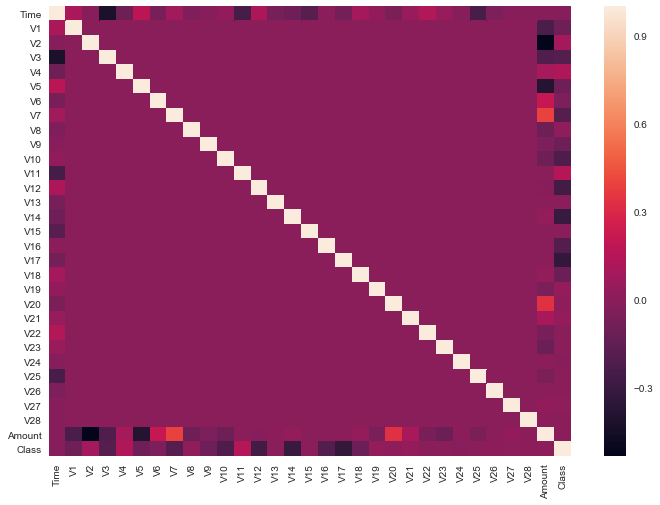

In [4]:
### Correlation among variables
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [5]:
feature_arr = df.columns[1:-1].values
feature_arr

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], dtype=object)

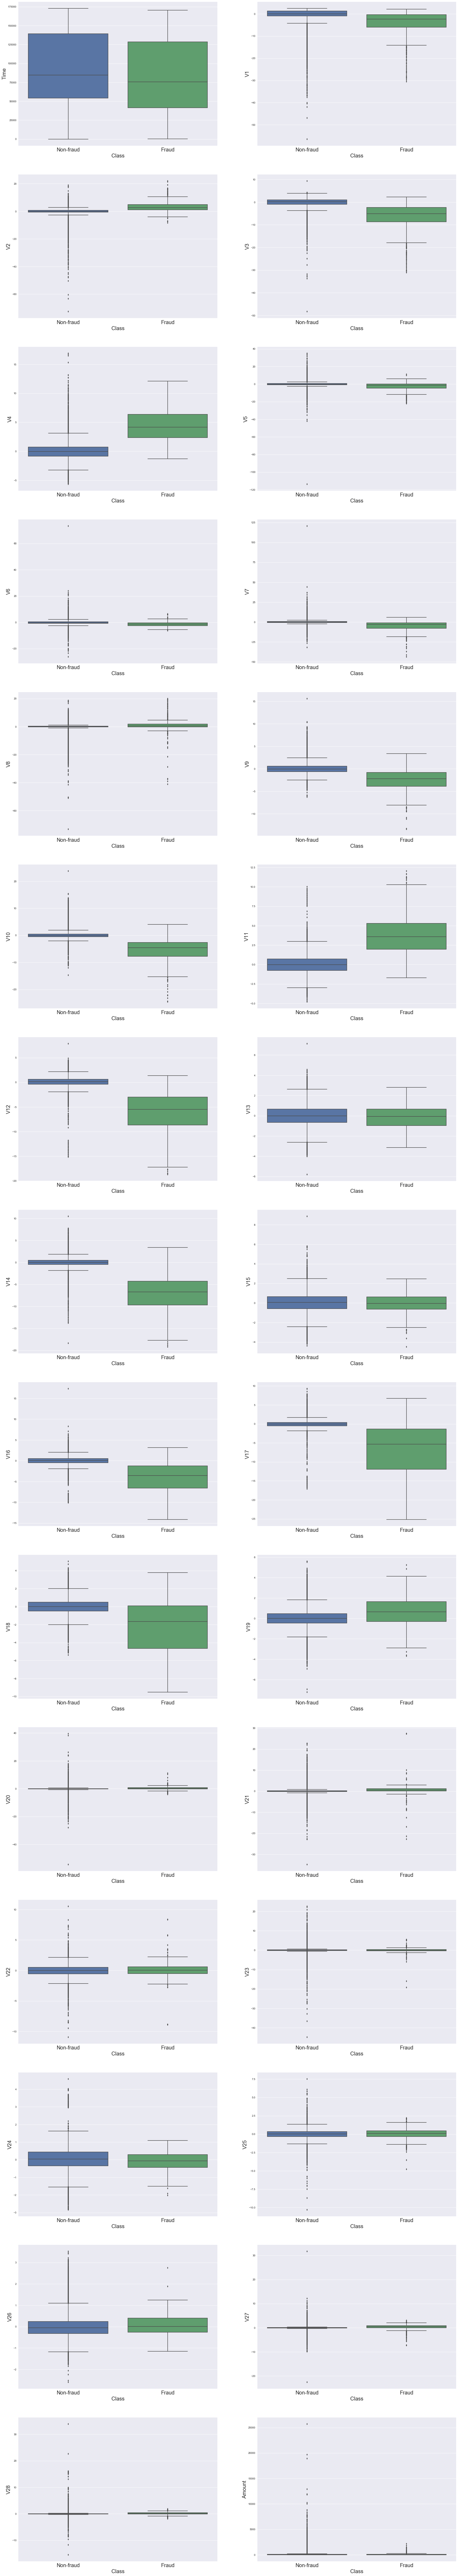

In [16]:
f = plt.figure(figsize=(30,180))
for i in range(0, 30): 
    ax = f.add_subplot(15,2,i+1)
    ax = sns.boxplot(x="Class", y=feature_arr[i], data=df)
    ax.set_ylabel(feature_arr[i], fontsize=20)
    ax.set_xlabel("Class", fontsize=20)
    ax.set_xticklabels(["Non-fraud", "Fraud"],fontsize=20)

From the boxplot, we observe that V1, V3, V4, V9, V10, V11, V12, V14, V16, V17, V18 have very different distributions for Fraud vs Non-fraud transactions. 

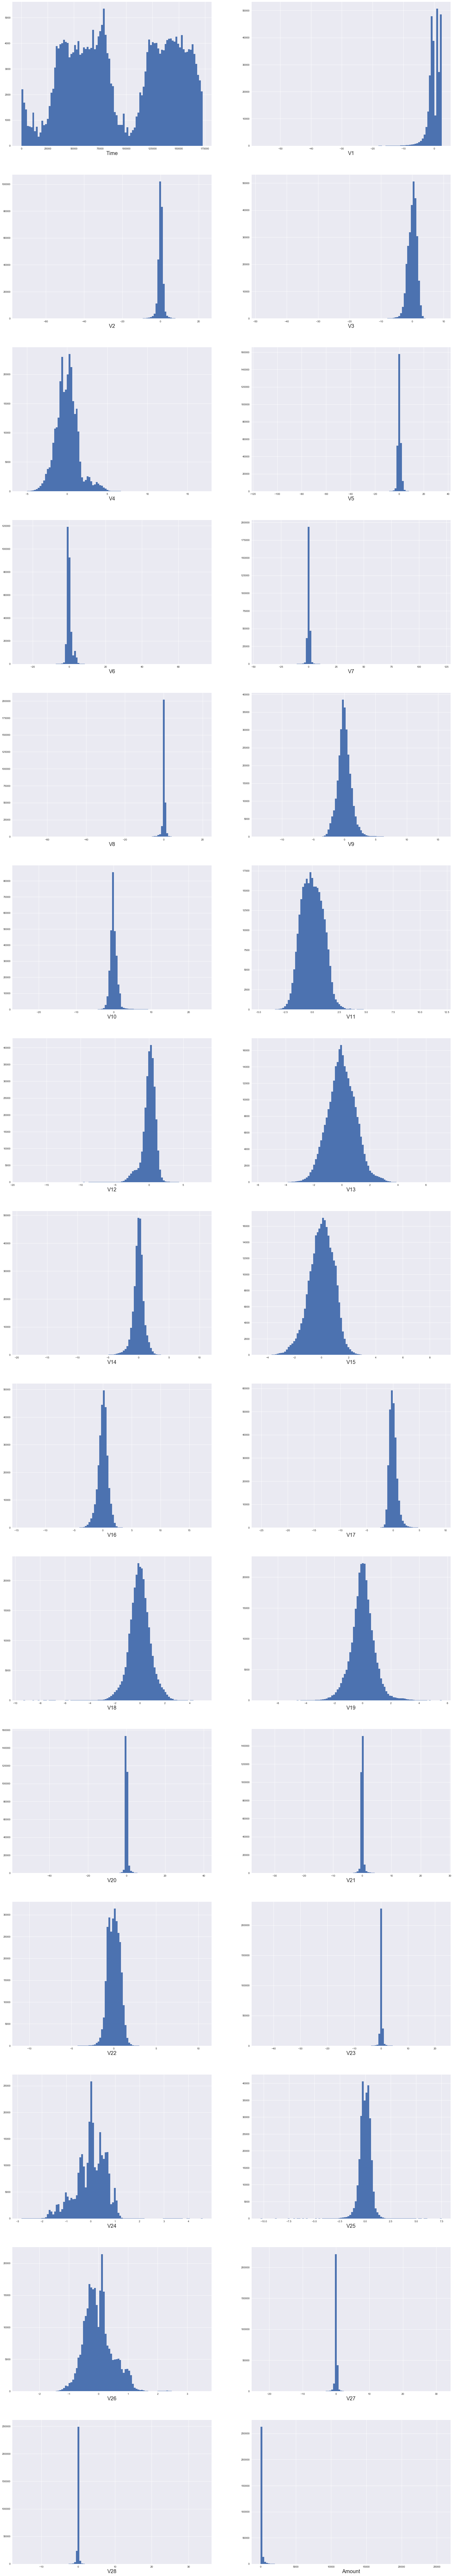

In [17]:
f = plt.figure(figsize=(30,180))
for i in range(0, 30): 
    ax = f.add_subplot(15,2,i+1)
    ax = df[feature_arr[i]].hist(bins=100)
    ax.set_xlabel(feature_arr[i], fontsize=20)

From the histograms, we observe prominent outliers in the following features: 
V18, V25, V26

V1,V12, V24 are skewed to the left (long left tails)

V4,V26 are skewed to the right (long right tails)

Time, V1, V4, V24, V26 have multiple modes.

V2, V5, V6, V7, V8, V10, V20, V21, V23, V27, V28, Amount are densely distributed.

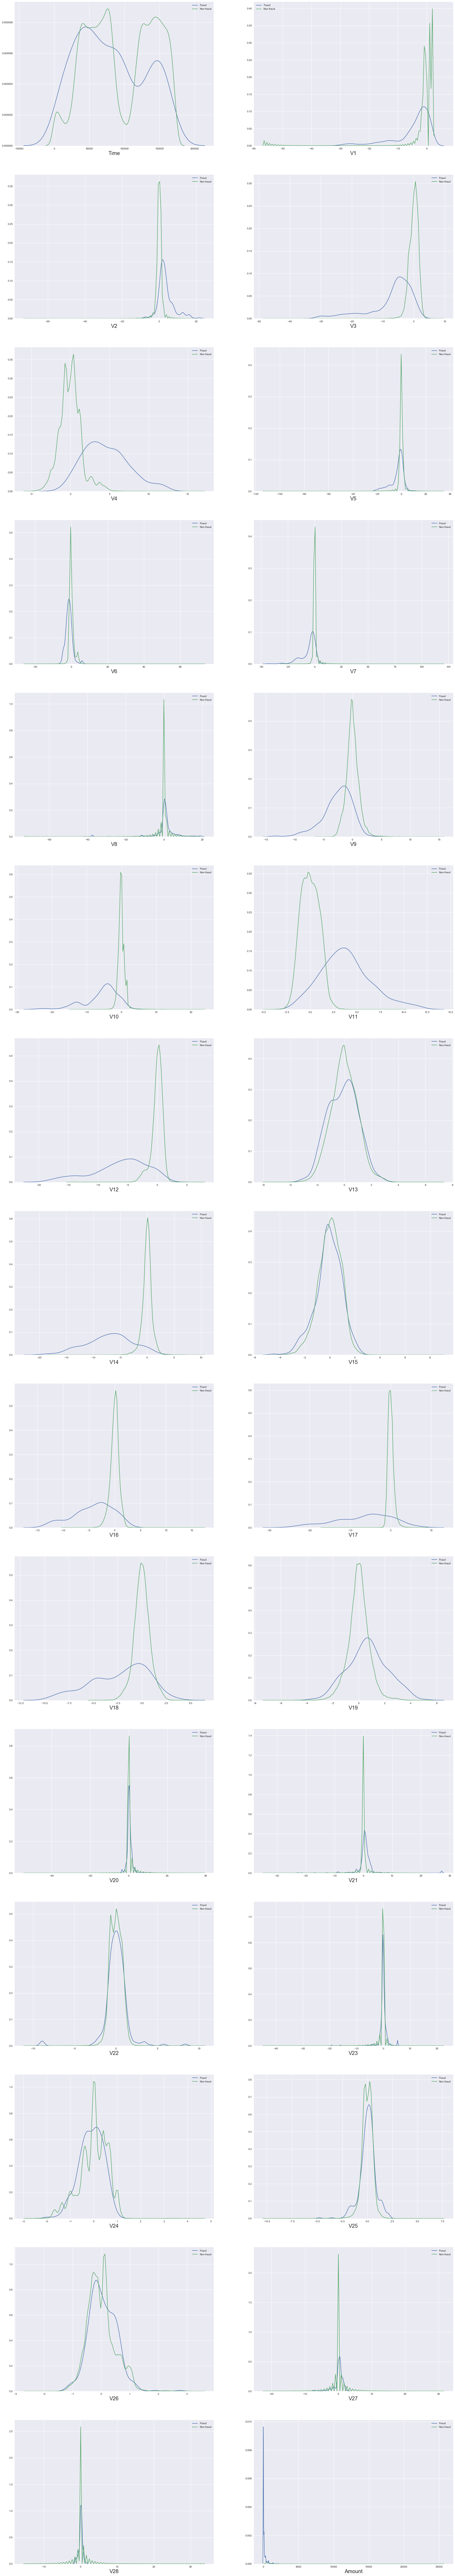

In [18]:
#g = sns.FacetGrid(df, row="sex", col="time", margin_titles=True)
#bins = np.linspace(0, 60, 13)
#g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

f = plt.figure(figsize=(30,180))
for i in range(0, 30): 
    ax = f.add_subplot(15,2,i+1)
    sns.distplot(df[feature_arr[i]].loc[df["Class"]==1.0],label = "Fraud",hist=False)
    sns.distplot(df[feature_arr[i]].loc[df["Class"]==0.0], label = "Non-fraud",hist=False)
    plt.legend()
    
    ax.set_xlabel(feature_arr[i], fontsize=20)



From the density plots, we observe that the shape of distribution of Fraud deviates from those of non-fraud for these features:  Time, V1, V3, V4, V9, V10, V11, V12, V14, V16, V17, V18, V19

Overall, the distributions of features of non-fraud have higher spread and variance. 

### EDA of resampled training data

In [9]:
df_resample = pd.read_csv("data/resample_df.csv")
df_resample.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,158453.0,2.094561,-0.827280,-1.493206,-0.513444,-0.428918,-0.794959,-0.281462,-0.288319,...,-0.120575,0.051099,0.103849,0.684904,-0.071362,0.761780,-0.080165,-0.049095,65.14,0.0
1,1,163503.0,1.971197,-0.326286,-1.303626,0.363868,0.099659,-0.301053,-0.024899,-0.091013,...,0.191623,0.746659,0.005074,0.860414,0.185236,0.666558,-0.080570,-0.069806,29.61,0.0
2,2,143201.0,2.031495,-0.269744,-0.536151,0.298784,-0.340236,-0.348439,-0.426236,-0.078201,...,-0.218718,-0.446918,0.280030,-0.684374,-0.318016,-0.583326,0.037731,-0.036324,7.99,0.0
3,3,81865.0,-2.624081,2.153765,0.752903,0.234243,-1.195105,1.798252,-3.797852,-6.979159,...,-3.528764,2.117063,0.327859,0.248706,-0.463584,0.404743,0.207824,0.184777,29.99,0.0
4,4,80145.0,-0.857634,1.107747,1.063217,1.243953,-0.142669,0.322056,0.146324,0.715638,...,0.066211,0.313025,-0.065624,0.022921,-0.111658,-0.237568,0.292232,0.120861,26.45,0.0


In [ ]:
df_resample.dtypes

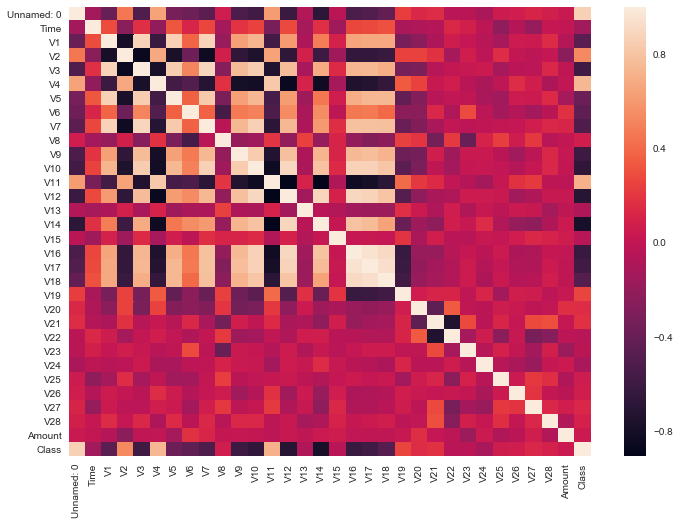

In [10]:
### Correlation among variables
corr = df_resample.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


Observations:

Negative Correlations: 
V2 is negatively correlated with V1, V3, V5, V10, V16, V17, V18
v3 is negatively correlated with V2, V4, V11
V7 is negatively correlated with V2, V4, V11
V9,V10 are both negatively correlated with V2, V4, V11... 

Positive Correlations: 
V16,V17,V18 are positively correlated


In [11]:
feature_arr = df_resample.columns[1:-1].values
feature_arr

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'], dtype=object)

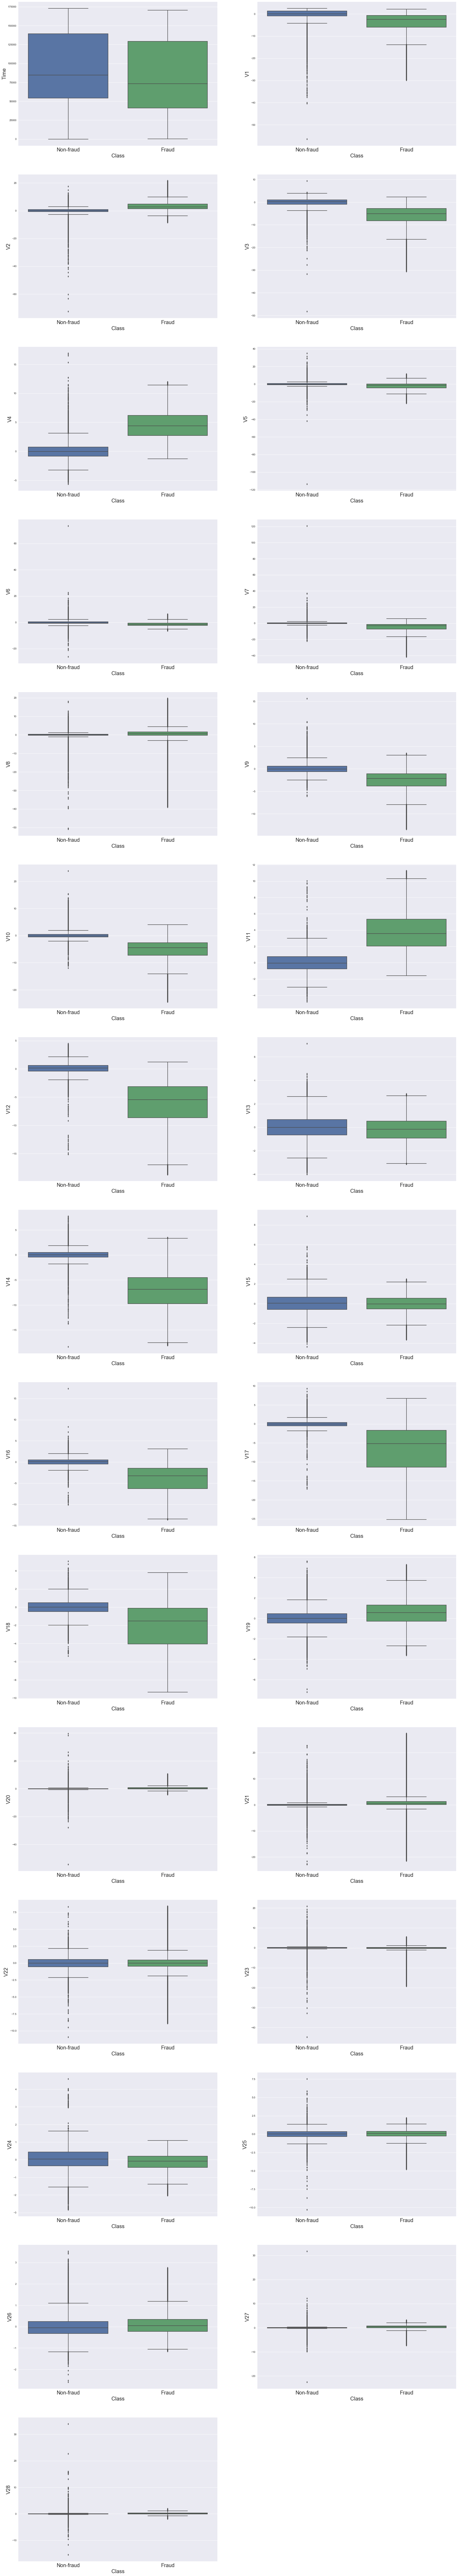

In [12]:
f = plt.figure(figsize=(30,180))
for i in range(0, 29): 
    ax = f.add_subplot(15,2,i+1)
    ax = sns.boxplot(x="Class", y=feature_arr[i], data=df_resample)
    ax.set_ylabel(feature_arr[i], fontsize=20)
    ax.set_xlabel("Class", fontsize=20)
    ax.set_xticklabels(["Non-fraud", "Fraud"],fontsize=20)

From the boxplot, we observe that V3, V4, V9, V10, V11, V12, V14, V16, V17, V18 have very different distributions for Fraud vs Non-fraud transactions. 

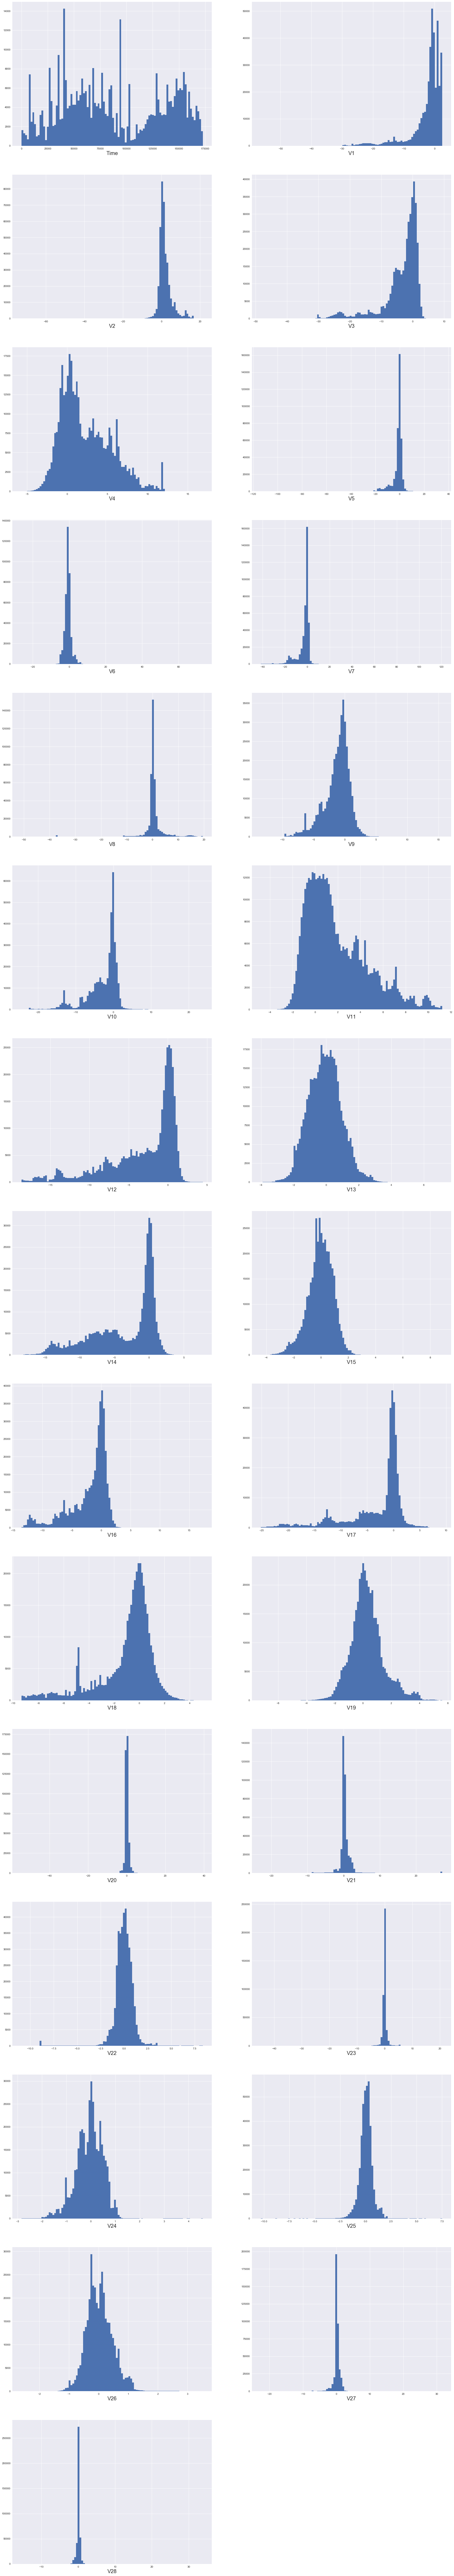

In [13]:
f = plt.figure(figsize=(30,180))
for i in range(0, 29): 
    ax = f.add_subplot(15,2,i+1)
    ax = df_resample[feature_arr[i]].hist(bins=100)
    ax.set_xlabel(feature_arr[i], fontsize=20)

From the histograms, we observe prominent outliers in the following features: 
V3, V8, V10, V22

V2, V3, V7, V9, V10, V12, V14, V16, V17, V18, V24,  are skewed to the left (long left tails)

V4, V11 are skewed to the right (long right tails)

Time, V7, V10, V11, V14, V16, V17, V18 have multiple modes.

V2, V5, V6, V7, V8, V20, V21, V23, V27, V28 are densely distributed.

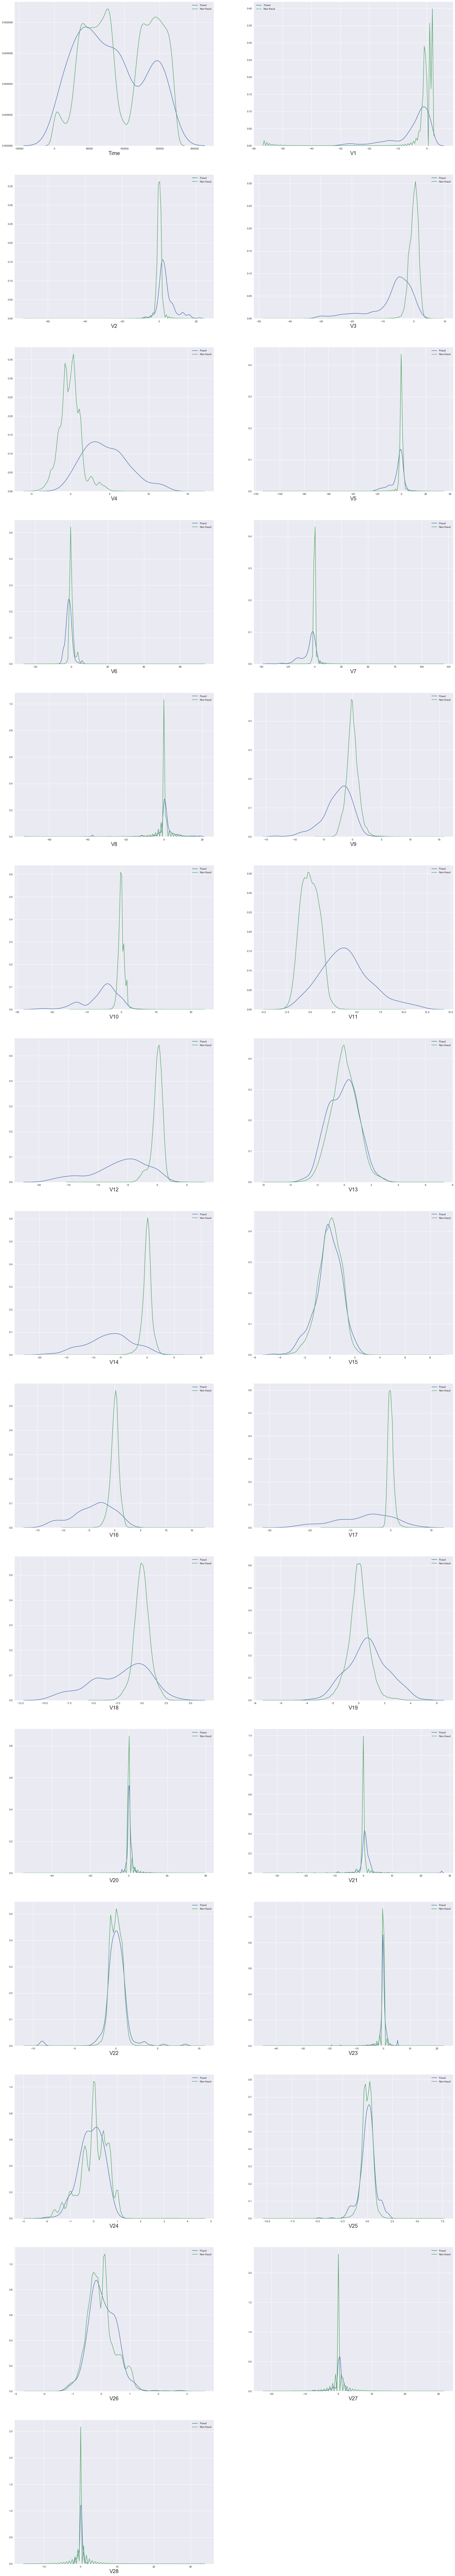

In [14]:
#g = sns.FacetGrid(df, row="sex", col="time", margin_titles=True)
#bins = np.linspace(0, 60, 13)
#g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

f = plt.figure(figsize=(30,180))
for i in range(0, 29): 
    ax = f.add_subplot(15,2,i+1)
    
    sns.distplot(df[feature_arr[i]].loc[df["Class"]==1.0],label = "Fraud",hist=False)
    sns.distplot(df[feature_arr[i]].loc[df["Class"]==0.0], label = "Non-fraud",hist=False)
    plt.legend()
    
    ax.set_xlabel(feature_arr[i], fontsize=20)


From the density plots, we observe that the shape of distribution of Fraud deviates from those of non-fraud for these features:  V1, V3, V4, V5, V7, V9, V10, V11, V12, V14, V16, V17, V18, V19, 

Overall, the distributions of features of non-fraud have higher spread and variance. 